# AlphaFold2 Quality Metric Plotting
**AlphaViewer Original Author:** [Severin Dicks](https://github.com/Intron7) (IBSM Freiburg)

**Additions & Fixes By:** Devon Boland

First we need to mount our Google Drive, and load all python modules for this script to work properly. This may take some time as this will need to install various depdencies to work with our pickle (*.pkl) files generated by AF2.

In [1]:
import google.colab
from google.colab import drive
drive.mount('/content/drive')
!/usr/bin/yes | pip install alpha-viewer
!/usr/bin/yes | pip install --quiet jax==0.4.0 jaxlib==0.4.0 1>tmp 2>null
from alpha_viewer import alpha_viewer
import pickle
import numpy as np
import matplotlib.pyplot as plt
import os

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The above chunk of code runs a small set of code that mounts your Google Drive to the Collab instance (the machine you are using in the Google Cloud) and import several python modules (think of these as smaller programs you can access within Python). To resolve the issue we experienced in class, I had to search through several forums and toolchain logs, and with trial and error this will now work with our *.pkl files generated from AlphaFold 2.3.1. Note if you try to use this python notebook on newer or older version it may not work properly. To address this you will have to load a different version of JAX and JAXLIB. Luckily versions 0.4.0, seem to work with our version of AlphaFold2.

Now the single of line of code below utilizes a wonderful module (original Author linked above) that will do most of the heavy lifting for us. To use it properly, you need to change the "Path/to/your/AF2/output/directory" to the actual path on your google drive. To do this you should see a column to the left of this scipt, click on the icon indicated in this photo:

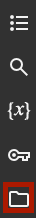

Now, if you Google Drive folder, mounted properly you should see a folder called "drive", click on it and navigate to your AF2 output directory you uploaded to your Google Drive (in this example, mine will be in a folder called AlphaFold2_Analysis/protein/, your path will likley be different):

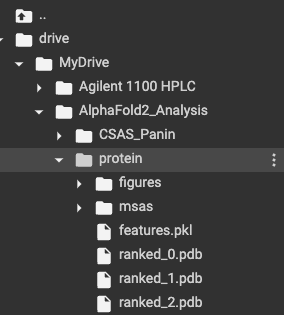

If you right click on this folder on the left tab, you sould see an option labelled "Copy path". Select this and paste the result between the quotation marks below. By running the chunks of code below, it should generate a pLDDT graph of your highest ranked model (ranked_0.pdb). If you used the "monomer_ptm" or "multimer" models of AF2 the "viewer.plot_pae" function will plot the pAE of your model. If you ran the "monomer" model of AF2, it will let you know that no pAE data exists in the directory and you should be running either of earlier mentioned models.

You can right click on these images, and download them directly or save them to your google drive.

Lastly, the final section of code will extract the MSA information from the features.pkl file in your directory

In [2]:
path_to_output="/content/drive/MyDrive/AlphaFold2_Analysis/CSAS_Panin/tetramer/out_DmCSAS3_noFLAG_tetramer_multimer/DmCSAS3_noFLAG_tetramer"

You can use `.plot_pLDDT()` and `.plot_pae()`

using model: model_2_multimer_v3_pred_1 with pLDDT 0.7897989239827741


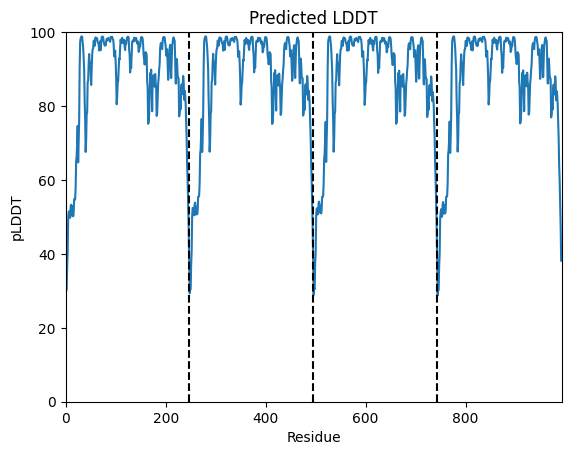

In [3]:
viewer = alpha_viewer(path_to_output, model = None, use_relaxed=True)
viewer.plot_pLDDT(save=True)

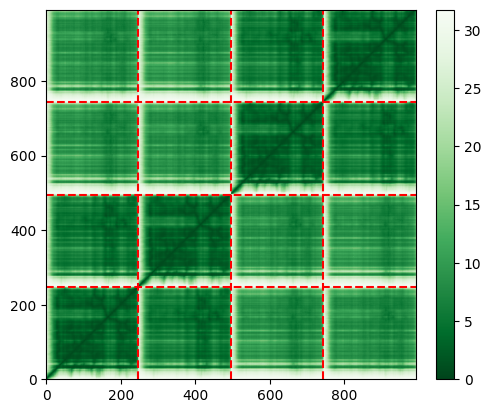

In [4]:
viewer.plot_pae(save=True)

Visualzie MSA Coverage

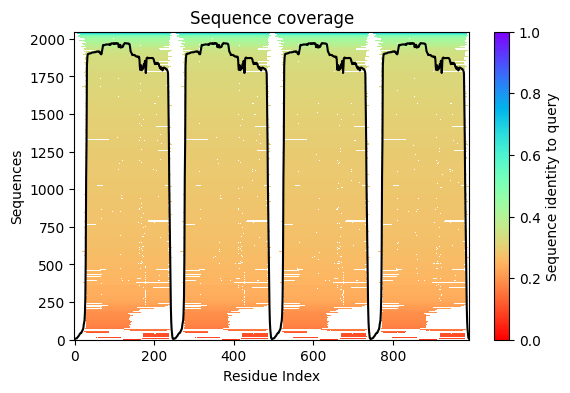

In [5]:
def generate_output_images(feature_pickle):
    msa = feature_dict['msa']
    seqid = (np.array(msa[0] == msa).mean(-1))
    seqid_sort = seqid.argsort()
    non_gaps = (msa != 21).astype(float)
    non_gaps[non_gaps == 0] = np.nan
    final = non_gaps[seqid_sort] * seqid[seqid_sort, None]



    ###################### PLOT MSA WITH COVERAGE ####################

    plt.figure(figsize=(14, 4), dpi=100)
    plt.subplot(1, 2, 1)
    plt.title("Sequence coverage")
    plt.imshow(final,
               interpolation='nearest', aspect='auto',
               cmap="rainbow_r", vmin=0, vmax=1, origin='lower')
    plt.plot((msa != 21).sum(0), color='black')
    plt.xlim(-0.5, msa.shape[1] - 0.5)
    plt.ylim(-0.5, msa.shape[0] - 0.5)
    plt.colorbar(label="Sequence identity to query", )
    plt.xlabel("Residue Index")
    plt.ylabel("Sequences")
    plt.savefig(path_to_output+"/MSA Coverage Plot", dpi=600)

    ##################################################################

feature_dict = pickle.load(open(path_to_output+"/features.pkl",'rb'))
generate_output_images(feature_dict)